# Disney+ Analysis

In [1]:
%matplotlib inline
from pathlib import Path 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in data

In [2]:
with open(Path("./disney_plus_titles.csv"), "r") as f:
    df = pd.read_csv(f)
print(df.shape)
print(df.keys())

(1450, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


## Distribution of Content

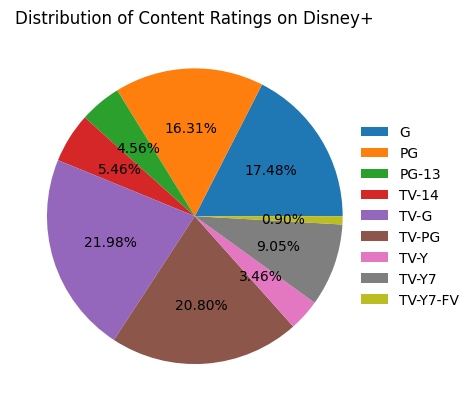

<Figure size 640x480 with 0 Axes>

In [3]:
%matplotlib inline
df_ratings = df.groupby(["rating"]).size().reset_index(name="counts")
plt.pie(df_ratings["counts"], autopct="%0.2f%%")
plt.title("Distribution of Content Ratings on Disney+")
plt.legend(df_ratings.rating, loc="right", bbox_to_anchor=(1.25, 0.5), frameon=False)
plt.show()
plt.savefig("age_ratings.pdf")

From this pie chart we see that the vast majority of content is intended to be viewed by all audiences.
Only ~11% of all content has any age restriction whatsoever, and none is intended for only a mature audience.

## Top 5 Actors and Directors

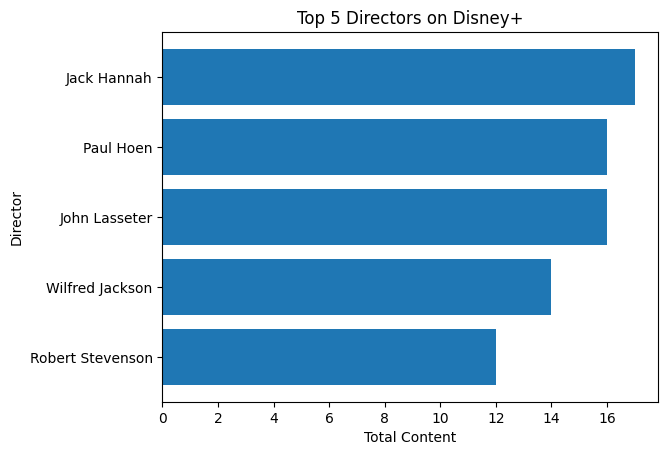

In [4]:
df["director"] = df["director"].fillna("No Director Specified")
df_directors = df["director"].str.split(",", expand=True).stack().to_frame()
df_directors.columns = ["Director"]
df_filtered_directors = df_directors.groupby(["Director"]).size().reset_index(name="Total Content")
df_filtered_directors = df_filtered_directors[df_filtered_directors["Director"] != "No Director Specified"]
df_filtered_directors = df_filtered_directors.sort_values(by=["Total Content"], ascending=False)
directors_top_5 = df_filtered_directors.head()
directors_top_5 = directors_top_5.sort_values(by=["Total Content"])
plt.barh(directors_top_5["Director"], directors_top_5["Total Content"])
plt.xlabel("Total Content")
plt.ylabel("Director")
plt.title("Top 5 Directors on Disney+")
plt.savefig("directors.pdf")

The top 5 directors on Disney+ are:
1. Jack Hannah
2. Paul Hoen
3. John Lasseter
4. Wilfred Jackson
5. Robert Stevenson

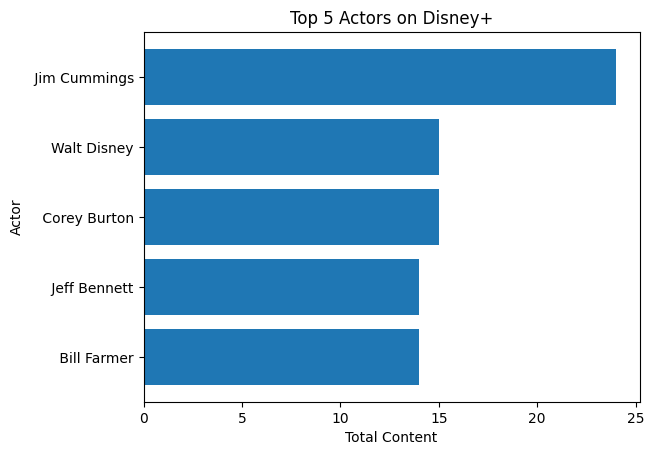

In [5]:
df["cast"] = df["cast"].fillna("No Cast Specified")
df_filtered_cast = df["cast"].str.split(",", expand=True).stack().to_frame()
df_filtered_cast.columns = ["Actor"]
actors = df_filtered_cast.groupby(["Actor"]).size().reset_index(name="Total Content")
actors = actors[actors["Actor"] != "No Cast Specified"]
actors = actors.sort_values(by=["Total Content"], ascending=False)
actors_top_5 = actors.head()
actors_top_5 = actors_top_5.sort_values(by=["Total Content"])
plt.barh(actors_top_5["Actor"], actors_top_5["Total Content"])
plt.xlabel("Total Content")
plt.ylabel("Actor")
plt.title("Top 5 Actors on Disney+")
plt.savefig("actors.pdf")

The top 5 actors on Disney+ are:
1. Jim Cummings
2. Walt Disney
3. Corey Burton
4. Jeff Bennett
5. Bill Farmer

## Analyzing Content on Disney+

/tmp/ipykernel_44797/3900573183.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_movies = df_after_2010[df_type_year["type"] == "Movie"]
/tmp/ipykernel_44797/3900573183.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tv = df_after_2010[df_type_year["type"] == "TV Show"]


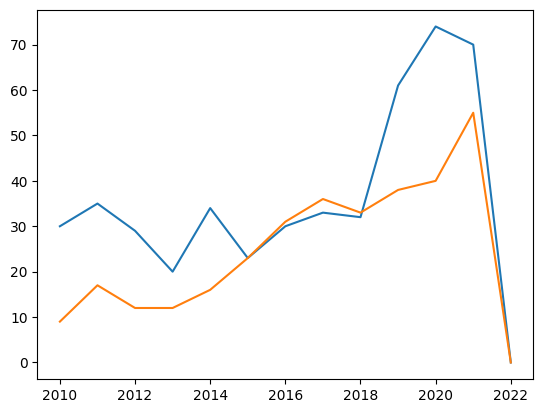

In [23]:
# Extract type ("Movie" or "TV Show") and release year (only after 2010)
df_type_year = df[["type", "release_year"]]
df_type_year = df_type_year.rename(columns={"release_year": "Release Year"})
df_after_2010 = df_type_year[df_type_year["Release Year"]>=2010]
df_movies = df_after_2010[df_type_year["type"] == "Movie"]
df_tv = df_after_2010[df_type_year["type"] == "TV Show"]

# Plot total content against release year
years = np.arange(2010, 2023)
count_movies = np.zeros(years.shape[0])
count_tv = np.zeros(years.shape[0])
for i, year in enumerate(years):
    count_movies[i] = (df_movies["Release Year"] == year).sum()
    count_tv[i] = (df_tv["Release Year"] == year).sum()

plt.plot(years, count_movies, label="Movie")
plt.plot(years, count_tv, label="TV Show")
plt.xlabel("Release year")
plt.ylabel("Total content")
plt.title("Trend of content produced over the years on Disney+")
plt.legend("")